# July

## 20th

### (E) 844. Backspace String Compare

40 / 8

In [ ]:
s = 'a#c'
t = 'c'

class Solution(object):
    def backspaceCompare(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: bool
        """


        stack1, stack2 = [], []

        for i in range(len(s)):
          if s[i] == '#':
            if len(stack1) != 0:
              stack1.pop()
            else:
              pass
          
          else:
            stack1.append(s[i])

        for j in range(len(t)):
          if t[j] == '#':
            if len(stack2) != 0:
              stack2.pop()
            else:
              pass
          else:
            stack2.append(t[j])

        return (stack1 == stack2)

print(Solution().backspaceCompare(s,t))

True


2nd way (12 / 61)

In [ ]:
s = 'a#c'
t = 'b'

class Solution(object):
    def backspaceCompare(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: bool
        """


        stack = ['', '']
        for idx in range(len(s)):
          
          if s[idx] == '#':

              stack[0] = stack[0][:-1] if len(stack[0]) != 0 else ''

          else:
            stack[0] += s[idx]


        for idx in range(len(t)):
          
          if t[idx] == '#':

              stack[1] = stack[1][:-1] if len(stack[1]) != 0 else ''

          else:
            stack[1] += t[idx]

          
        print(f"s : {stack[0]}, t : {stack[1]}")
        return (stack[0] == stack[1])

print(Solution().backspaceCompare(s,t))

s : c, t : b
False


### (M) 299. Bulls and Cows

29 / 91

In [ ]:
secret = '1'
guess = '1'

class Solution(object):
    def getHint(self, secret, guess):
        """
        :type secret: str
        :type guess: str
        :rtype: str
        """

        hash = {}

        for idx in range(len(secret)):

          if (secret[idx]) in hash: # if this is not a first time for the digit
            hash[secret[idx]] += [idx]
          else:
            hash[secret[idx]] = [idx]

        bulls, cows, cows_candi = 0, 0, {}

        for idx in range(len(guess)):
          if guess[idx] in hash: # if the digit exist in secret
            if idx in hash[guess[idx]]: # if the position is the same
              bulls += 1
              hash[guess[idx]].remove(idx)

            else: # position is not the same
              if guess[idx] in cows_candi:
                cows_candi[guess[idx]] += 1
              else:
                cows_candi[guess[idx]] = 1


        for item in cows_candi:
          if item in hash:
            cows += min(len(hash[item]), cows_candi[item])
      
        return '{}A{}B'.format(bulls, cows)

Got slower and also memory usage is fucked up - 22 / 23

if-else -> ternary operator

In [ ]:
secret = '1'
guess = '1'

class Solution(object):
    def getHint(self, secret, guess):
        """
        :type secret: str
        :type guess: str
        :rtype: str
        """

        hash = {}

        for idx in range(len(secret)):

           # if this is not a first time for the digit
            hash[secret[idx]] = hash[secret[idx]] + [idx] if (secret[idx]) in hash else [idx]

        bulls, cows, cows_candi = 0, 0, {}

        for idx in range(len(guess)):
          if guess[idx] in hash: # if the digit exist in secret
            if idx in hash[guess[idx]]: # if the position is the same
              bulls += 1
              hash[guess[idx]].remove(idx)

            else: # position is not the same
              
                cows_candi[guess[idx]] = cows_candi[guess[idx]] + 1 if guess[idx] in cows_candi else 1


        for item in cows_candi:
          if item in hash:
            cows += min(len(hash[item]), cows_candi[item])
      
        return '{}A{}B'.format(bulls, cows)

### (M) 438. Find All Anagrams in a String ★★

Time exceeded / crude code

In [ ]:
class Solution(object):
    def findAnagrams(self, s, p):
        ans = []
        hash = {}

        for idx in range(len(p)):
    
                    hash[p[idx]] = hash[p[idx]] + 1 if (p[idx]) in hash else 1

        i = 0
        while i < len(s):

          if s[i] in hash:

            tmp = hash.copy()
            tmp[s[i]] -= 1

            if tmp[s[i]] == 0:
              tmp.pop(s[i])

            for j in range(i + 1, min(i + len(p), len(s))):

              if s[j] in tmp:
                tmp[s[j]] -= 1

                if tmp[s[j]] == 0:
                  tmp.pop(s[j])


              else:
                break
            
            if tmp == {}:
              ans.append(i)     
            i += 1
          else:
            i += 1

        return ans

In [ ]:
s = 'cbaebabacd'
p = 'abc'

print(Solution().findAnagrams(s, p))

0
1
2
3
4
5
6
7
8
9
[0, 6]


Using 'Counter' - 18 / 95

In [ ]:
from collections import Counter

class Solution(object):
    def findAnagrams(self, s, p):
        cnt = Counter(p)
        
        ans = []
        l = 0
        for r, c in enumerate(s):
            cnt[c] -= 1
            while cnt[c] < 0:  # If number of characters `c` is more than our expectation
                cnt[s[l]] += 1  # Slide left until cnt[c] == 0
                l += 1
            if r - l + 1 == len(p):  #  If we already filled enough `p.length()` chars
                ans.append(l)  # Add left index `l` to our result
                
        return ans

## 21st

### (E) 409. Longest Palindrome


90 / 61

In [ ]:
from collections import Counter

s = 'ccc'

class Solution(object):
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: int
        """

        cnt = Counter(s)
        even = [ ele if (ele % 2) == 0 else ele - 1 for ele in list(cnt.values())]

        return sum(even) + 1 if any(ele % 2 == 1 for ele in list(cnt.values())) == True else sum(even)
        

print(Solution().longestPalindrome(s))

3


### (M) 2. Add Two Numbers


For the test<br>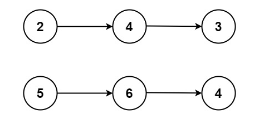

In [ ]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

l1 = ListNode(2)
l1.next = ListNode(4)
l1.next.next = ListNode(3)

l2 = ListNode(5)
l2.next = ListNode(6)
l2.next.next = ListNode(4)

80 / 42

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution(object):
    def addTwoNumbers(self, l1, l2):
        """
        :type l1: ListNode
        :type l2: ListNode
        :rtype: ListNode
        """
        cursor = l1
        num1 = 0
        t = 1

        while cursor != None:
          num1 += cursor.val * t
          t *= 10
          cursor = cursor.next

        cursor = l2
        num2 = 0
        t = 1

        while cursor != None:
          num2 += cursor.val * t
          t *= 10
          cursor = cursor.next

        res = num1 + num2

        head = dummy = ListNode(-1)

        while True:
          head.next = ListNode((res%10))
          head = head.next
          res = res // 10

          if res == 0:
            break

        return dummy.next

print(Solution().addTwoNumbers(l1, l2))

0


Memory efficient way (defining single list instead of two seperate variables) - 40 / 68

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution(object):
    def addTwoNumbers(self, l1, l2):
        """
        :type l1: ListNode
        :type l2: ListNode
        :rtype: ListNode
        """
        cursor = l1
        nums = [0, 0]
        t = 1

        while cursor != None:
          nums[0] += cursor.val * t
          t *= 10
          cursor = cursor.next

        cursor = l2
        t = 1

        while cursor != None:
          nums[1] += cursor.val * t
          t *= 10
          cursor = cursor.next

        res = sum(nums)
        head = dummy = ListNode(-1)

        while True:
          head.next = ListNode((res%10))
          head = head.next
          res = res // 10

          if res == 0:
            break

        return dummy.next

print(Solution().addTwoNumbers(l1, l2))

deleting cursor-defining parts - 79 / 68

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution(object):
    def addTwoNumbers(self, l1, l2):
        """
        :type l1: ListNode
        :type l2: ListNode
        :rtype: ListNode
        """
        nums = [0, 0]
        t = 1

        while l1 != None:
          nums[0] += l1.val * t
          t *= 10
          l1 = l1.next

        t = 1

        while l2 != None:
          nums[1] += l2.val * t
          t *= 10
          l2 = l2.next

        res = sum(nums)
        head = dummy = ListNode(-1)

        while True:
          head.next = ListNode((res%10))
          head = head.next
          res = res // 10

          if res == 0:
            break

        return dummy.next

print(Solution().addTwoNumbers(l1, l2))

### (M) 7. Reverse Integer

56 / 37

In [ ]:
class Solution(object):
    def reverse(self,x):

      if x < 0:
        int_string = str(x)[1:][::-1]

        for i in range(len(int_string)):
          if int_string[i] != 0:
            return -int(int_string[i:]) if -2**31 <= -int(int_string[i:]) else 0
      else:
        int_string = str(x)[::-1]

        for i in range(len(int_string)):
          if int_string[i] != 0:
            return int(int_string[i:]) if int(int_string[i:]) <= 2**31 -1 else 0


1021

### (E) 746. Min Cost Climbing Stairs / ★★★

I realized that I still have a serious weakness in DP after struggling and failing to solve this problem. There were some cases that I gave a few medium-difficulty problem two stars(★★) since I came up with the key idea and wrote down some crude codes but eventually referrenced other's code from leetcode solution.<br><br>But this time, no single idea came to my mind :( I gotta revisit this problem again and agian.

[One of the best leetcode python solutions](https://leetcode.com/problems/min-cost-climbing-stairs/discuss/657490/Python-solution-from-a-beginner-(some-easy-steps-to-follow-to-solve-dp)

In [ ]:
class Solution:
    def minCostClimbingStairs(self, cost):
        if not cost:
            return 0
        
        cur = 0
        dp0 = cost[0]
        
        if len(cost) > = 2:
            dp1=cost[1]
        
        for i in range(2, len(cost)):

            cur = cost[i] + min(dp0, dp1)
            dp0 = dp1
            dp1 = cur
            
        return min(dp0, dp1)

My thoughts after seeing the solution : It was a way easy problem for even me. The reason I failed to solve it is that I went overboard - I made too many subproblems which led to a messy structure of the entire code. 